In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-detection/spam.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/spam-detection/spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df = df.rename({'v1': 'target', 'v2': 'text'}, axis =1)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
def le(col):
    labelencoder = LabelEncoder()
    col = labelencoder.fit_transform(col)
    return col
df['target'] = le(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isna().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

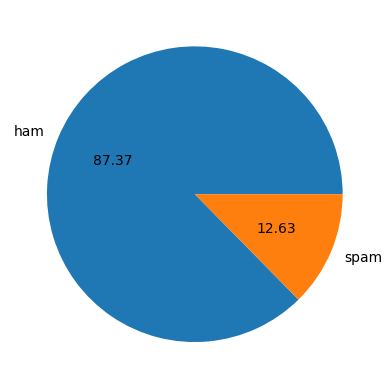

In [13]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [14]:
df['num_char'] =df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [18]:
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [19]:
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


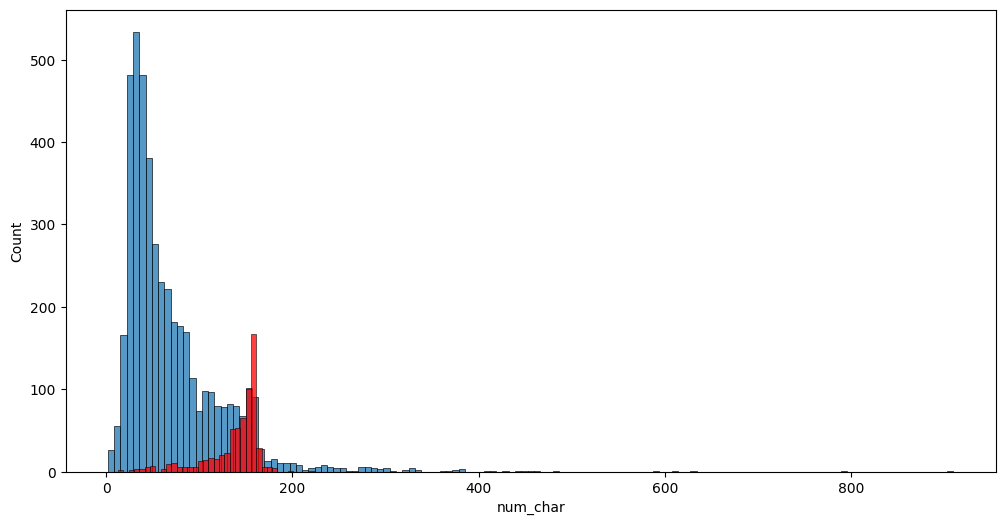

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char']) #ham
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red')#spam
plt.show()

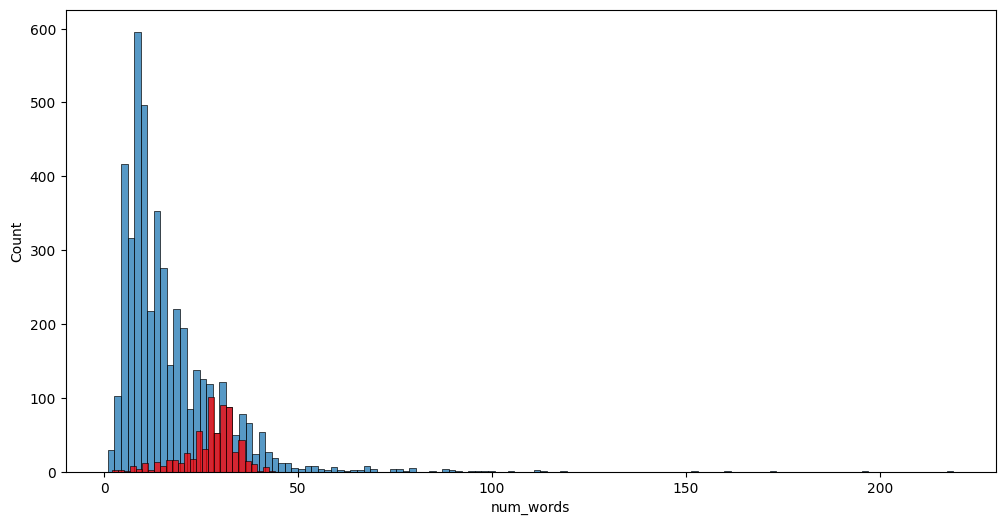

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) #ham
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')#spam
plt.show()

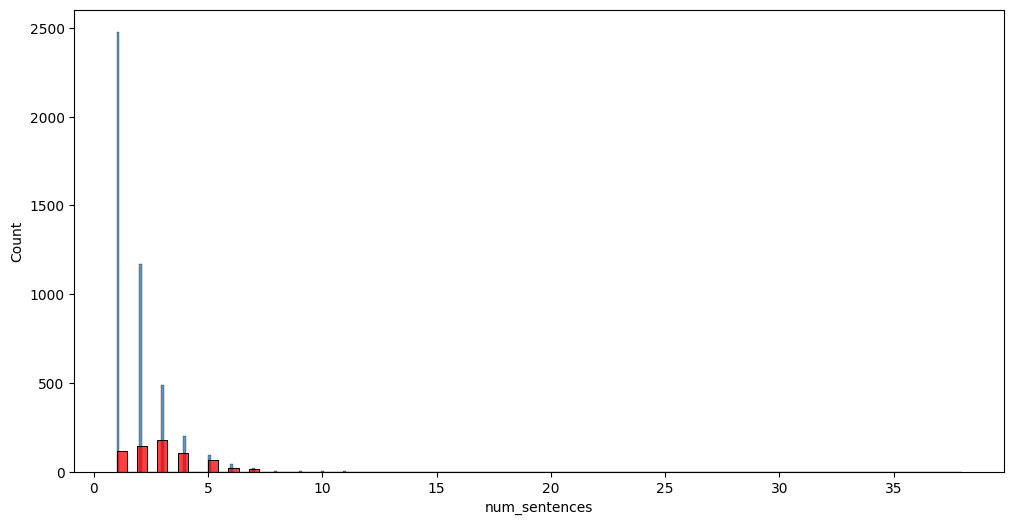

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']) #ham
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')#spam
plt.show()

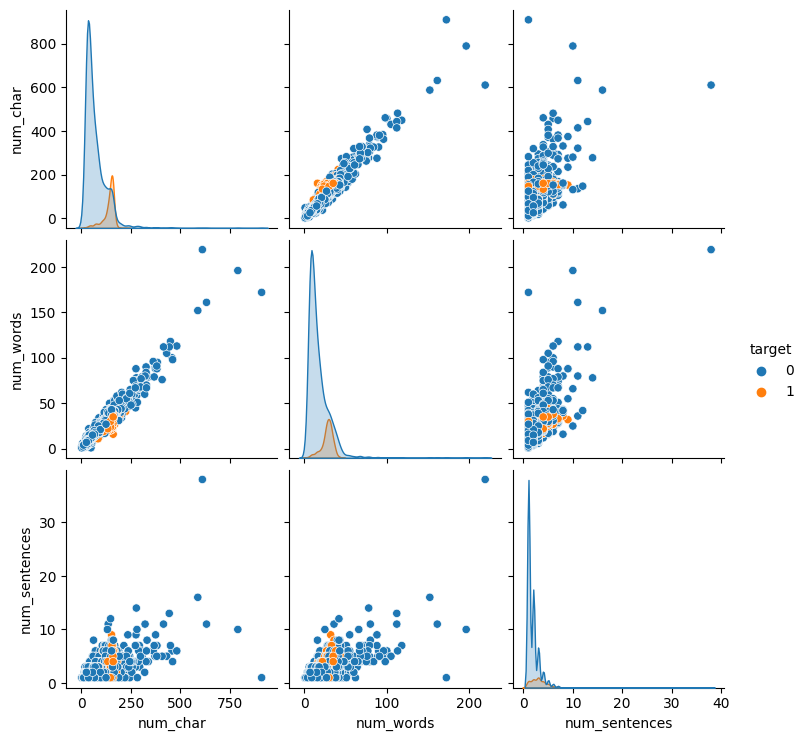

In [23]:
sns.pairplot(df, hue = 'target')

<Axes: >

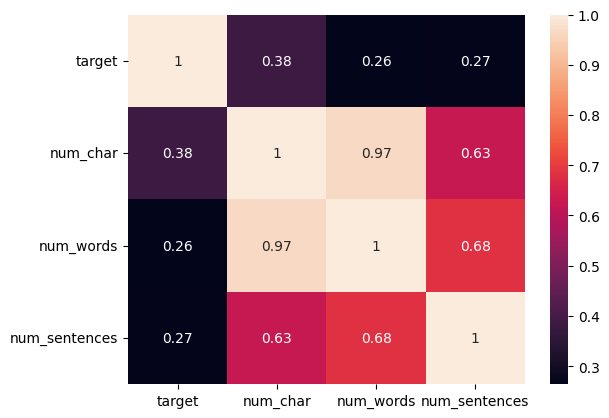

In [24]:
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sentences']].corr(), annot = True)

In [25]:
txt = 'HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%'
txt = txt.lower()
txt

'hello how are you priyanshu? hope you doing fine! i like to do machine learning%'

In [26]:
txt = nltk.word_tokenize(txt)
txt

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 '?',
 'hope',
 'you',
 'doing',
 'fine',
 '!',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning',
 '%']

In [27]:
x = []
for i in txt:
    if i.isalnum():
        x.append(i)
x

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 'hope',
 'you',
 'doing',
 'fine',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning']

In [28]:
txt = x[:]  #so list are immutable 
x.clear()
for i in txt:
    if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machine', 'learning']

In [29]:
txt = x[:]
x.clear()
for i in txt:
    ps = PorterStemmer()
    i = ps.stem(i)
    x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machin', 'learn']

In [30]:
def tranform_text(text):
    text = text.lower()  #lower case
    text = nltk.word_tokenize(text)  # tokenization
    
    # removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # remove stopwords and punctuation:
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))
    return " ".join(y)

In [31]:
tranform_text('HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%')

'hello priyanshu hope fine like machin learn'

In [32]:
df['tranformed_text'] = df['text'].apply(tranform_text)
df.head()

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


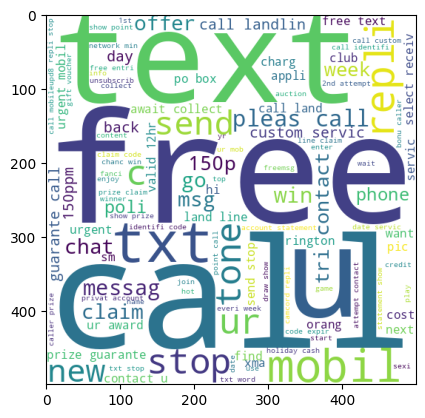

In [33]:
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud = wc.generate(df[df['target'] ==1]['tranformed_text'].str.cat(sep=" "))
plt.imshow(spam_wordcloud)

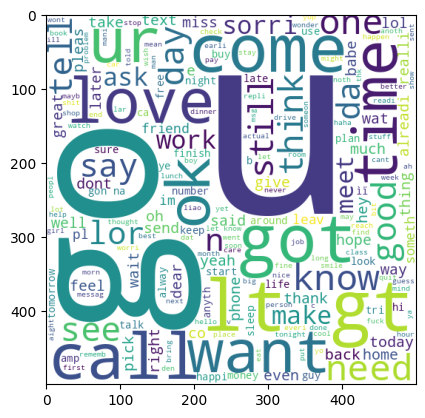

In [34]:
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
ham_wordcloud = wc.generate(df[df['target'] ==0]['tranformed_text'].str.cat(sep=" "))
plt.imshow(ham_wordcloud)

In [35]:
spam_corpus = []
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9883

In [36]:
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
df_spam

,Word,Frequency
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


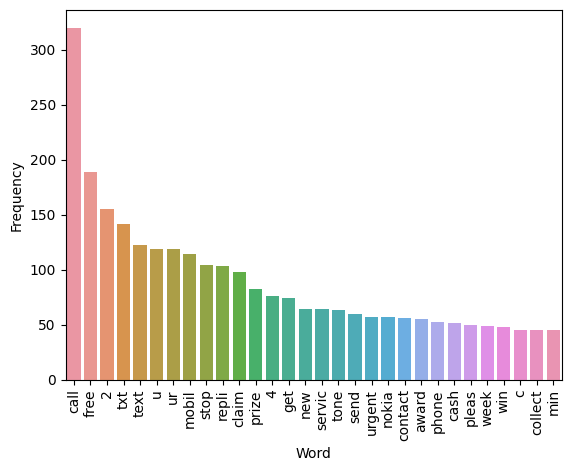

In [37]:
sns.barplot(x='Word', y='Frequency', data=df_spam)
plt.xticks(rotation = 'vertical')
plt.show()

In [38]:
ham_corpus = []
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

34771

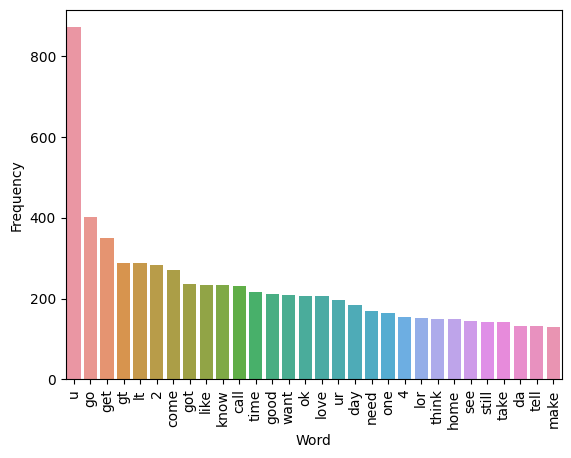

In [39]:
from collections import Counter
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_ham)
plt.xticks(rotation = 'vertical')
plt.show()


In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer()

In [41]:
df.head()

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
X_cv = cv.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
X_cv.shape


(5169, 6629)

In [44]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_cv, y, test_size =0.2, random_state = 2)

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score  
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [47]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))
#In this problem statement precision score is very importatant so it able to classify properly in this true positive

accuracy Score:  0.874274661508704

confusion matrix: 
[[786 110]
 [ 20 118]]

precision score:  0.5175438596491229


In [48]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.965183752417795

confusion matrix: 
[[872  24]
 [ 12 126]]

precision score:  0.84


In [49]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred3))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred3))
print()
print("precision score: ", precision_score(y_test, y_pred3))

accuracy Score:  0.9709864603481625

confusion matrix: 
[[893   3]
 [ 27 111]]

precision score:  0.9736842105263158


In [50]:
tfidf = TfidfVectorizer()
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X_tf, y, test_size =0.2, random_state = 2)

In [52]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))
#In this problem statement precision score is very importatant so it able to classify properly in this false positive

accuracy Score:  0.8704061895551257

confusion matrix: 
[[787 109]
 [ 25 113]]

precision score:  0.509009009009009


In [53]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9593810444874274

confusion matrix: 
[[896   0]
 [ 42  96]]

precision score:  1.0


In [54]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred3))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred3))
print()
print("precision score: ", precision_score(y_test, y_pred3))

accuracy Score:  0.9709864603481625

confusion matrix: 
[[893   3]
 [ 27 111]]

precision score:  0.9736842105263158


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
        'xgb':xgb
}

In [57]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision


In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score

# Assuming 'clfs' is a dictionary containing classifiers
# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are defined

# Initialize empty lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

# Iterate through classifiers
for clf_name, clf in clfs.items():
    # Train classifier and calculate scores
    accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

# Create DataFrame
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

performance_df


,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.976789,0.991379
7,ETC,0.975822,0.974790
0,SVC,0.972921,0.966102
9,xgb,0.970986,0.935484
4,LR,0.952611,0.932039
6,AdaBoost,0.961315,0.929825
8,GBDT,0.951644,0.892857
3,DT,0.936170,0.846154


In [59]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.976789
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.970986
6,LR,Accuracy,0.952611
7,AdaBoost,Accuracy,0.961315
8,GBDT,Accuracy,0.951644
9,DT,Accuracy,0.936170


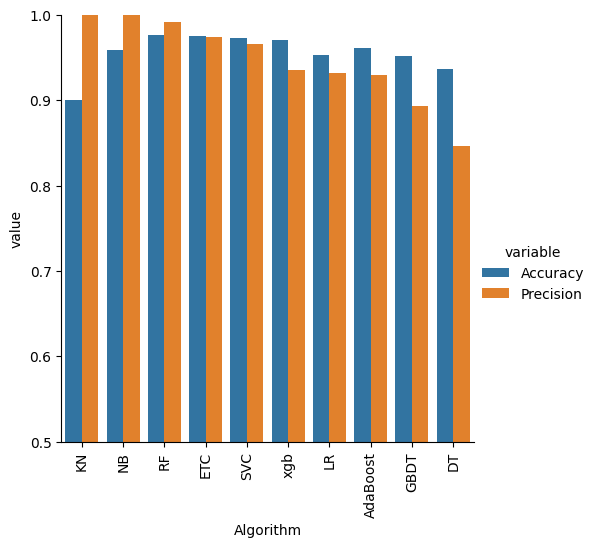

In [60]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
#Data Preprocessing ---> Vectorization(tfidf with max features 3000) ----> model(multinomial navie bayes)
df

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [62]:
X = df['tranformed_text']
y = df['target']

In [63]:
tfidf = TfidfVectorizer(max_features = 3000) #our model is giving best accuracy for 3000 features and the precision stays 1
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_train_tf, X_test_tf, y_train_tf, y_test_tf= train_test_split(X_tf, y, test_size =0.2, random_state = 2)

In [64]:
mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train_tf)

MultinomialNB()